# Problem Set 4. Quantative Macroeconomics
## Alena Sokolyanskaya

[.1] We define Lagrangian:

$\Lambda = \sum \beta^{t} u(c, h_{t}) - \lambda_{t} (c_{t} +k_{t+1} - k_{t}^{1-\theta}(h_{t})^{\theta} - (1-\delta)k_{t})$

[.2] Calculating FOCs wrt $c_{t}$ and $k_{t+1}$:

$[c_{t}]: \beta u'(c_{t}) = \lambda_{t}$

$[k_{t+1}]: \lambda_{t} = \lambda_{t+1}(1-\delta+(1-\theta)k_{t+1}^{-\theta}(h_{t+1})^{\theta})$

In the SS $k_{t+1} = k_{t} = k^{ss}$ and $c_{t+1} = c_{t} = c^{ss}$.

[.3] We get that:

$k^{ss} = \left[ \dfrac{(1-\theta)(h)^{\theta}}{\dfrac{1}{\beta} - 1 + \delta} \right]^{1/\theta}$

$i^{ss} = k^{ss} - (1-\delta) k^{ss} = \delta k^{ss}$

Normalizing, y = 1 we get: $1 = k^{1-\theta} h^{\theta}$ and therefore:

$k = \left[ \dfrac{(1-\theta)}{\dfrac{1}{\beta} - 1 + \delta} \right]^{1/\theta}$


## Question 1. Value Function Iteration

0.025008681986946613


/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


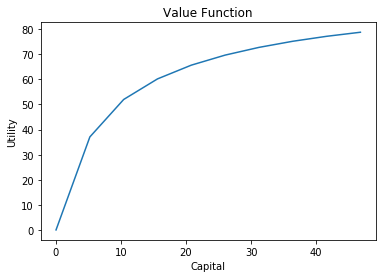

In [317]:
import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt
import timeit

theta = 0.679
beta = 0.988
delta = 0.013

# defining k_ss

k_ss=((1-theta)/((1/beta)+delta-1))**(1/theta)
k=np.linspace(0.01,1.1*k_ss,10) # discretesize

#STEP 2
V = np.empty(shape=[10, 200])
# initial vector v0
V[:,0]=np.zeros((10))

#STEP 3. return matrix M
# combinations of inputs
m1,m2=np.meshgrid(k,k)

def f(m1,m2):
    return m1**(1-theta) + (1-delta)*m1 - m2
N = f(m1,m2)

# utility function
def u(m1,m2):
    for i,j in zip(range(0,10),range(0,10)):
        if N[i,j]>=0:
            return np.log(m1**(1-theta) + (1-delta)*m1 - m2)
        else:
            return -100

M = u(m1,m2)
M[np.isnan(M)] = 0 

#STEP 4

start = timeit.default_timer()

X = np.empty(shape=[10, 10])    
for k in range(0,199): #iterations
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        X[i,j]=M[i,j]+(beta*V[:,k][j])
    for i in range(0,10):
        V[:,k+1][i]= np.amax(X[:,i])
    for k,i in zip(range(0,199),range(0,10)):
        if abs(V[:,k+1][i]-V[:,k][i])< epsilon:
            break
        else:
            continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)
#print("Program Executed in "+execution_time) 

#STEP 5
G=np.empty(shape=(10,1)) # policy function
for i in range(0,9):
    G[i]=np.argmax(X[:,i]) 
    
#STEP 6
plt.figure()
k=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k,V[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.show()


#### In general case the time for the code to run is 0.025 sec. As expected the running time is the longest, since we did not introduce information on monotoncity or concavity, so it takes more time for the computer to evaluate this characteristics of the value function.

0.017555609985720366


Text(0,0.5,'Utility')

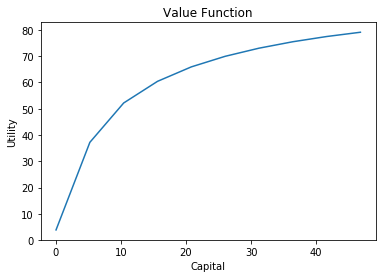

In [323]:
### WITH MONOTONICITY

#STEP 4 including monotonicity
start = timeit.default_timer()

V1 = np.empty(shape=[10, 200])
V1[:,0]=np.zeros((10))
G1 = np.empty(shape=[10, 200])
X1 = np.empty(shape=[10, 10]) 
X1[np.isnan(X1)] = 0 
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,1)):
        if j >= G1[:,s+1][i]: # monotonicity condition
            X1[i,j]=M[i,j]+(beta*V1[:,s][j])
            for i in range(0,10):
                V1[:,s+1][i]= np.amax(X1[i,:])
                G1[:,s]=np.argmax(X1[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V1[:,s+1][i]-V1[:,s][i])< epsilon:
                    break
                else:
                    continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V1[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

#### Including monoticity information the time of the code decreased to 0.017

0.005930822982918471


Text(0,0.5,'Utility')

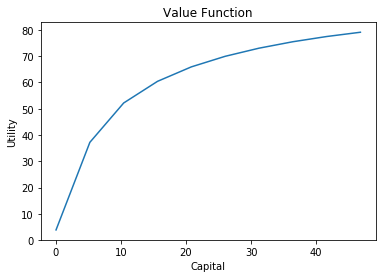

In [324]:
### WITH CONCAVITY

#STEP 4 including concavity
start = timeit.default_timer()

X2 = np.empty(shape=[10, 10])
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        if X2[i, j-1]>X2[i,j]: # concavity
            X2[i,j]=M[i,j]+(beta*V1[:,s][j])
            X2[np.isnan(X2)] = 0 
            for i in range(0,10):
                V1[:,s+1][i]= np.amax(X1[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V1[:,s+1][i]-V1[:,s][i])< epsilon:
                    break
                else:
                    continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V1[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

#### Including information on concavity the time slightly decreased to 0.005. It is significantly smaller compared to the case when we are introducing monotonicity.

0.18301228695781901


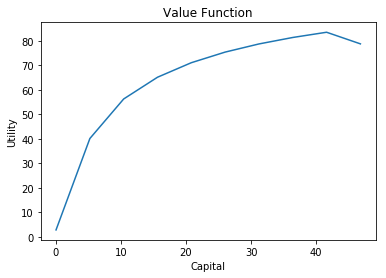

In [325]:
### LOCAL SEARCH

#STEP 4 with local search 
start = timeit.default_timer()

V3 = np.empty(shape=[10, 200])
V3[:,0]=np.zeros((10))
G3 = np.empty(shape=[10, 200])
X3 = np.empty(shape=[10, 10]) 
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        if j >= G3[:,s+1][i]:
            X3[i,j]=M[i,j]+(beta*V3[:,s][j])
            X3[np.isnan(X3)] = 0 
            for i in range(0,10):
                V3[:,s+1][i]= np.amax(X3[i,:])
                G3[:,s]=np.argmax(X3[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V3[:,s+1][i]-V3[:,s][i])< epsilon:
                    break
                else:
                    continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V3[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.show()

### Time increased to 0.18 once including local search, becasue we add a condtiotion and it takes time to check it.

0.0233517789747566


Text(0,0.5,'Utility')

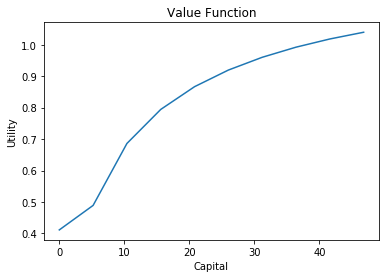

In [329]:
## CONCAVITY + MONOTONICITY

#STEP 4
start = timeit.default_timer()

V4 = np.empty(shape=[10, 200])
V4[:,0]=np.zeros((10))
G4 = np.empty(shape=[10, 200])
X4 = np.empty(shape=[10, 10]) 

for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        if j >= G4[:,s+1][i] and X4[i, j-1]>X4[i,j]: # monotonicity + concavity condition
            X4[np.isnan(X4)] = 0
            X4[i,j]=M[i,j]+(beta*V4[:,s][j])
            for i in range(0,10):
                V4[:,s+1][i]= np.amax(X4[i,:])
                G4[:,s]=np.argmax(X4[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V4[:,s+1][i]-V4[:,s][i])< epsilon:
                    break
                else:
                    continue
                    
stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V4[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')


In [ ]:
### Howard's policy iterations


## [.2] Redo item 1 adding a labor choice that is continuous.

### To introduce continous labor choice we calculate it as following:

$h_{ss} = (k_{ss})^{-\dfrac{1-\theta}{\theta}}$

### and insert the new values in the utility function equation

/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


0.04111687297699973


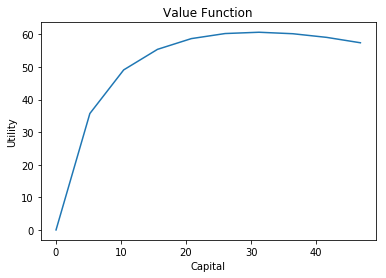

In [341]:
theta = 0.679
beta = 0.988
delta = 0.013

# defining k_ss

k_ss=((1-theta)/((1/beta)+delta-1))**(1/theta)
k=np.linspace(0.01,1.1*k_ss,10) # discretesize

#STEP 2
V = np.empty(shape=[10, 200])
# initial vector v0
V[:,0]=np.zeros((10))

#STEP 3. return matrix M
# combinations of inputs
m1,m2=np.meshgrid(k,k)

def f(m1,m2):
    return m1**(1-theta) + (1-delta)*m1 - m2
N = feasibility(m1,m2)

# defining optimal labor 
h_ss = (k_ss)**(-(1-theta)/theta)
h= np.linspace(0.01,1.1*h_ss,10)

# utility function
def u(m1,m2):
    for i,j in zip(range(0,10),range(0,10)):
        if N[i,j]>=0:
            return np.log(m1**(1-theta) + (1-delta)*m1 - m2)- 5.24*(2/3)*h**(3/2)
        else:
            return -100

M = utility(m1,m2)
M[np.isnan(M)] = 0 

#STEP 4

start = timeit.default_timer()

X = np.empty(shape=[10, 10])    
for k in range(0,199): #iterations
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        X[i,j]=M[i,j]+(beta*V[:,k][j])
    for i in range(0,10):
        V[:,k+1][i]= np.amax(X[:,i])
    for k,i in zip(range(0,199),range(0,10)):
        if abs(V[:,k+1][i]-V[:,k][i])< epsilon:
            break
        else:
            continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time) 

#STEP 5
G=np.empty(shape=(10,1)) # policy function
for i in range(0,9):
    G[i]=np.argmax(X[:,i]) 
    
#STEP 6
plt.figure()
k=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k,V[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.show()


### Once introducing continuous labor choice the results for time running of the code are similar the previous exercise.

0.04827602201839909


Text(0,0.5,'Utility')

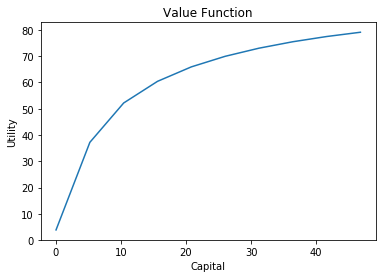

In [370]:
### WITH MONOTONICITY

#STEP 4 including monotonicity
start = timeit.default_timer()

V1 = np.empty(shape=[10, 200])
V1[:,0]=np.zeros((10))
G1 = np.empty(shape=[10, 200])
X1 = np.empty(shape=[10, 10]) 
X1[np.isnan(X1)] = 0 
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,1)):
        if j >= G1[:,s+1][i]: # monotonicity condition
            X1[i,j]=M[i,j]+(beta*V1[:,s][j])
            for i in range(0,10):
                V1[:,s+1][i]= np.amax(X1[i,:])
                G1[:,s]=np.argmax(X1[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V1[:,s+1][i]-V1[:,s][i])< epsilon:
                    break
                else:
                    continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V1[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

0.0018732469761744142


Text(0,0.5,'Utility')

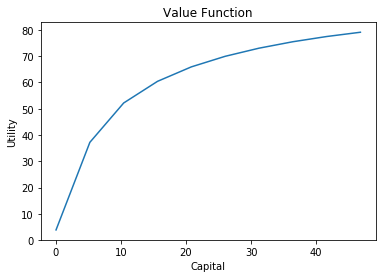

In [360]:
### WITH CONCAVITY

#STEP 4 including concavity
start = timeit.default_timer()

X2 = np.empty(shape=[10, 10])
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        if X2[i, j-1]>X2[i,j]: # concavity
            X2[i,j]=M[i,j]+(beta*V1[:,s][j])
            X2[np.isnan(X2)] = 0 
            for i in range(0,10):
                V1[:,s+1][i]= np.amax(X1[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V1[:,s+1][i]-V1[:,s][i])< epsilon:
                    break
                else:
                    continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V1[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

0.3090086770243943


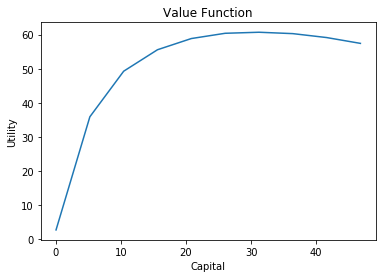

In [358]:
### LOCAL SEARCH

#STEP 4 with local search 
start = timeit.default_timer()

V3 = np.empty(shape=[10, 200])
V3[:,0]=np.zeros((10))
G3 = np.empty(shape=[10, 200])
X3 = np.empty(shape=[10, 10]) 
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        if j >= G3[:,s+1][i]:
            X3[i,j]=M[i,j]+(beta*V3[:,s][j])
            X3[np.isnan(X3)] = 0 
            for i in range(0,10):
                V3[:,s+1][i]= np.amax(X3[i,:])
                G3[:,s]=np.argmax(X3[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V3[:,s+1][i]-V3[:,s][i])< epsilon:
                    break
                else:
                    continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V3[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.show()

0.044280410977080464


Text(0,0.5,'Utility')

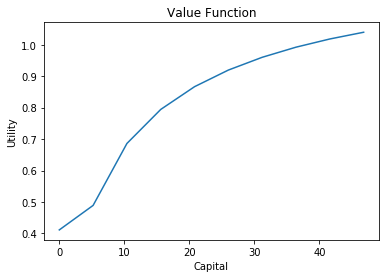

In [372]:
## CONCAVITY + MONOTONICITY

#STEP 4
start = timeit.default_timer()

V4 = np.empty(shape=[10, 200])
V4[:,0]=np.zeros((10))
G4 = np.empty(shape=[10, 200])
X4 = np.empty(shape=[10, 10]) 

for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,10),range(0,10)):
        if j >= G4[:,s+1][i] and X4[i, j-1]>X4[i,j]: # monotonicity + concavity condition
            X4[np.isnan(X4)] = 0
            X4[i,j]=M[i,j]+(beta*V4[:,s][j])
            for i in range(0,10):
                V4[:,s+1][i]= np.amax(X4[i,:])
                G4[:,s]=np.argmax(X4[i,:])
            for k,i in zip(range(0,199),range(0,10)):
                if abs(V4[:,s+1][i]-V4[:,s][i])< epsilon:
                    break
                else:
                    continue
                    
stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)

k1=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k1,V4[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')


### So the shortest time execution is when we are introducing concavity, the time radically decreases. But once we are adding the condtion to check in case of the local search time for run increases even more than in case on the general value function without concavity or monotonicity.

## Question 2. Business Cycle Fluctuations

In [388]:
import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt
import timeit

theta = 0.679
beta = 0.988
delta = 0.013

# defining k_ss

k_ss=((1-theta)/((1/beta)+delta-1))**(1/theta)
k=np.linspace(0.01,1.1*k_ss,10) # discretesize
z = [1.01, 1/1.01]


# combinations of inputs
#m1,m2,m3=np.meshgrid(k,k,z)

def m(m1,m2,m3):
    return m3*m1**(1-theta) + (1-delta)*m1 - m2
#N = m(m1,m2,m3)

# utility function
def u(m1,m2,m3):
    for i,j in zip(range(0,10),range(0,10)):
        if N[i,j]>=0:
            return np.log(m3*m1**(1-theta) + (1-delta)*m1 - m2)
        else:
            return -100

    
#STEP 3. return matrix M
Chi =[0]*20
M1 =[0]*10
for i in range(10):
    M1[i]=[0]*10
    for j in range(10):
        M1[i][j] = m(m1, m2, 1.01)
        
M2 =[0]*10
for i in range(10):
    M2[i]=[0]*10
    for j in range(10):
        M2[i][j] = u(m1, m2, 1.01)  

M = np.concatenate((M1, M2), axis=0)


Chi = [0]* (p*2)    
for i in range(p*2):
    Chi[i] = [0] * p
        

#STEP 4

start = timeit.default_timer()

X = np.empty(shape=[10, 10])    
for k in range(0,199): #iterations
    epsilon=0.01
    for i,j,p in zip(range(0,10),range(0,10),range(0,10)):
        X[i,j]=M[i,j]+(beta*V[:,k][p+j])
    for i in range(0,10):
        V[:,k+1][i]= np.amax(X[:,i])
    for k,i in zip(range(0,199),range(0,10)):
        if abs(V[:,k+1][i]-V[:,k][i])< epsilon:
            break
        else:
            continue

stop = timeit.default_timer()
execution_time = stop - start
print(execution_time)


#STEP 5
G=np.empty(shape=(10,1)) # policy function
for i in range(0,9):
    G[i]=np.argmax(X[:,i]) 
    
#STEP 6
plt.figure()
k=np.linspace(0.01,1.1*k_ss,10)
plt.plot(k,V[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()